# Receipt OCR - Text Recognition by Tesseract

###### Problem Definition - Given a arbitrary photo containing a receipt, extract grand total number

The solution is divided into smaller tasks:



[1] Get a scanned version of receipt by restoring perspective (done in the previous notebook)                                   
[2] Apply OCR to find all texts within image                                                                                   
[3] Find grand total as the largest number among recognized texts

###### Steps:

[1] Find grand total as the largest number among recognized texts                                                               
[2] Extracting all the texts from the image                                                                                     
[3] Obtaining grand total as the largest floating point number among texts

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pytesseract
import re

from pytesseract import Output

Defining helper methods:

In [2]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

In [3]:
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

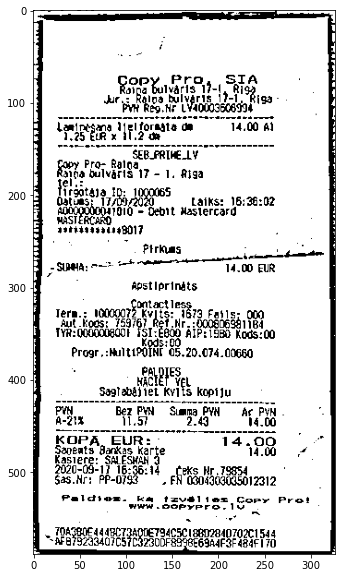

In [4]:
file_name = "result_receipt.png"
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE) 
plot_gray(image)

## Step 1: Text box detection :

In [5]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

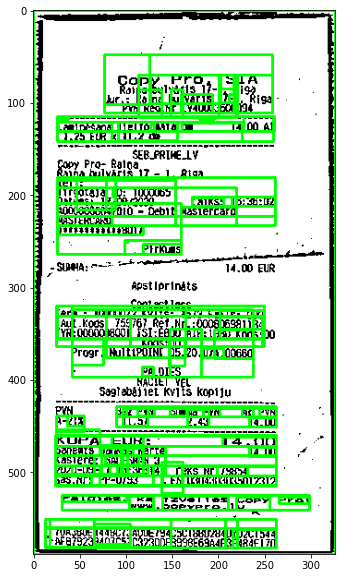

In [7]:
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)

## Step 2: Text recognition :

In [8]:
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

ee Yanga io

919 ul aras Ud (34 Bl

iz x arr Ts)
Tosipigage east oe

atare |
Latks: 16:36:02
BECO cate

pared
SoransantoeB017
” Ptriags

it en
Tatoodanieddi Be

Progr, mi 06, Bo. 074. 1c

bay

Bez PYN Summa PY Ag PY
an Sea" Natt

angie

KOPA, EUR 14.900
Sreat barns aa 14.00
‘SAL ESM:
uf

Rastere
0-08-17 16:96: T9854
Sescirs HP-ORSS" ef OSaNacoegIZa12

Paldion. ua tevelies Gory Prot

44807: sein 17
Sevarice arts




## Step 3: Extracting grand total


Used regular expression to extract all floating point numbers out of the all detected texts.

In [9]:
def find_amounts(text):
    amounts = re.findall(r'\d+\.\d{2}\b', text)
    floats = [float(amount) for amount in amounts]
    unique = list(dict.fromkeys(floats))
    return unique

In [10]:
amounts = find_amounts(extracted_text)
amounts

[14.0]

In [11]:
max(amounts)

14.0

Hence, we got the correct Grand Total of amount present in the receipt